# Actividad Módulo 23: Numpy y Problemas Estadísticos
1. Importar el archivo "supermarket_sales.csv"
2. Importar librería Numpy. Generar estadística descriptiva de las columnas unit_price y quantity. Calcular moda, media y mediana.
3. Obtener:
    - Ticket promedio por ciudad
    - Ticket promedio por product line y ciudad
    - Ticket promedio por género
    - Ticket promedio por género y product line
4. Usar método rank para generar top 5 (en número y % al grand total):
    - Ventas por ciudad
    - Ventas por memeber
    - Ventas por customer type
5. Cálculo de matriz de correlación:
    - Entre la hora (sin minutos) y el total
    - Entre el precio unitario con el rating de la transacción para validar si los productos más caros son los que dejan mayor margen de ganancia

In [98]:
# 1. Importar archivo y cargarlo en un pd.dataframe
import pandas as pd
df = pd.read_csv('supermarket_sales.csv')
df.sample(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
660,322-02-2271,B,Mandalay,Normal,Female,Sports and travel,42.97,3,6.4455,135.3555,2/3/2019,11:46,Cash,128.91,4.761905,6.4455,9.3
303,439-54-7422,A,Yangon,Normal,Female,Electronic accessories,51.19,4,10.2380,214.9980,3/18/2019,17:15,Credit card,204.76,4.761905,10.2380,4.7
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.6500,1042.6500,2/15/2019,14:53,Credit card,993.00,4.761905,49.6500,6.6
728,210-74-9613,C,Naypyitaw,Normal,Male,Fashion accessories,97.26,4,19.4520,408.4920,3/16/2019,15:33,Ewallet,389.04,4.761905,19.4520,6.8
302,735-06-4124,C,Naypyitaw,Normal,Male,Food and beverages,48.61,1,2.4305,51.0405,2/25/2019,15:31,Cash,48.61,4.761905,2.4305,4.4
472,405-31-3305,A,Yangon,Member,Male,Fashion accessories,43.13,10,21.5650,452.8650,2/2/2019,18:31,Credit card,431.30,4.761905,21.5650,5.5
442,138-17-5109,A,Yangon,Member,Female,Home and lifestyle,89.21,9,40.1445,843.0345,1/15/2019,15:42,Credit card,802.89,4.761905,40.1445,6.5
390,541-89-9860,C,Naypyitaw,Member,Female,Fashion accessories,80.48,3,12.0720,253.5120,2/15/2019,12:31,Cash,241.44,4.761905,12.0720,8.1
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9


In [99]:
# Analisis primario del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [100]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [101]:
# 2. Importar Numpy y generar estadística descriptiva de unit_price y quantity
import numpy as np

# Cargar pd.series a np.arrays 
unit_price_np = df['Unit price'].to_numpy()
quantity_np = df['Quantity'].to_numpy()

# Estadísticas descriptivas de unit_price y quantity

mean_unitprice = unit_price_np.mean()
median_unitprice = np.percentile(unit_price_np, 50)
vals, count = np.unique(unit_price_np, return_counts=True)
mode_unitprice = vals[np.argmax(count)]

print(f'La moda de unit_price es de ${mode_unitprice:.2f}')
print(f'La mediana de unit_price es de ${median_unitprice:.2f}')
print(f'La media de unit_price es de ${mean_unitprice:.2f}')


mean_quantity  = quantity_np.mean()
median_quantity = np.percentile(quantity_np, 50)
vals, count = np.unique(quantity_np, return_counts=True)
mode_quantity = vals[np.argmax(count)]

print(f'\nLa moda de quantity es de {mode_quantity:.0f} unidades')
print(f'La mediana de quantity es de {median_quantity:.0f} unidades')
print(f'La media de quantity es de {mean_quantity:.2f} unidades')


La moda de unit_price es de $83.77
La mediana de unit_price es de $55.23
La media de unit_price es de $55.67

La moda de quantity es de 10 unidades
La mediana de quantity es de 5 unidades
La media de quantity es de 5.51 unidades


Text(0.5, 1.0, 'Histograma de precio unitario')

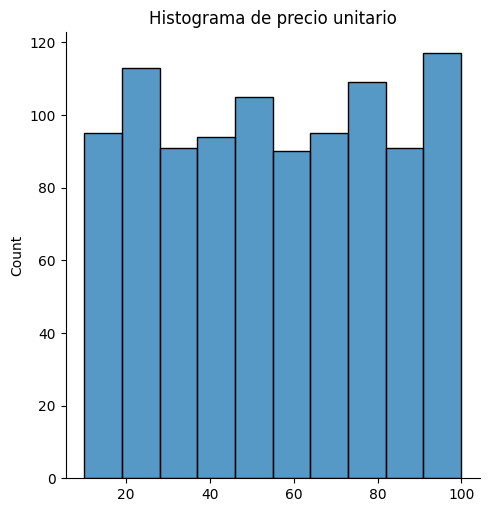

In [102]:
# Gráficos para exploración de las series mencionadas
import matplotlib.pyplot as plt 
import seaborn as sns

sns.displot(unit_price_np, bins=10)
plt.title('Histograma de precio unitario')

Text(0.5, 1.0, 'Histográma de cantidad vendida')

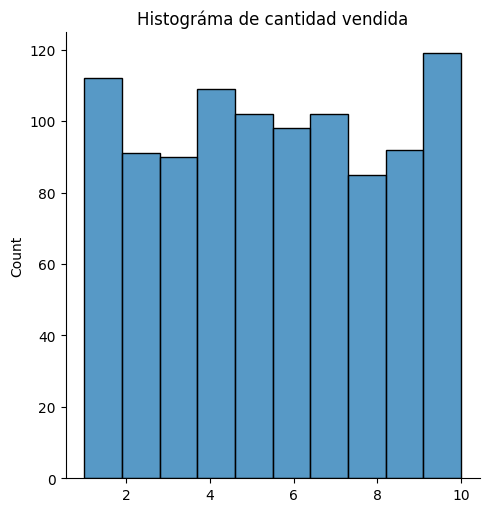

In [103]:
sns.displot(quantity_np, bins=10)
plt.title('Histográma de cantidad vendida')

## Insights 1:
- Como se puede inferir de las medidas de tendencia central. Al ser las medianas muy cercanas a la moda, no existe un sesgo de los datos de precio unitario ni de cantidad.
- Al hacer los histogramas de ambas series de datos nos podemos dar cuenta que tampoco siguen una distribución normal puesto quye no existe nada parecido a una campana de Gauss. La distribución de ambas series de datos asemejan más a distribuciones uniformes.

In [104]:
# 3.1 Obtener ticket promedio por ciudad
# Pandas
df.pivot_table(values='Total', index='City', aggfunc='mean').round(2)

,Total
City,
Mandalay,319.87
Naypyitaw,337.10
Yangon,312.35


In [105]:
# Numpy
city_np = df['City'].to_numpy()
total_np = df['Total'].to_numpy()

# Ticket promedio para la ciudad de Mandalay
city_avg_ticket = total_np[city_np == 'Mandalay'].mean()
print(f'The average ticket for the city of Mandalay is of ${city_avg_ticket:.2f}')

# Ticket promedio para la ciudad de Naypyitaw
city_avg_ticket = total_np[city_np == 'Naypyitaw'].mean()
print(f'The average ticket for the city of Naypyitaw is of ${city_avg_ticket:.2f}')

# Ticket promedio para la ciudad de Yangon
city_avg_ticket = total_np[city_np == 'Yangon'].mean()
print(f'The average ticket for the city of Yangon is of ${city_avg_ticket:.2f}')


The average ticket for the city of Mandalay is of $319.87
The average ticket for the city of Naypyitaw is of $337.10
The average ticket for the city of Yangon is of $312.35


In [106]:
# 3.2 Ticket promedio por product line y ciudad
# Pandas 
df.pivot_table(index=['Product line', 'City'], values='Total', aggfunc='mean').round(2)

Total
Product line           City             
Electronic accessories Mandalay   310.03
                       Naypyitaw  344.89
                       Yangon     305.29
Fashion accessories    Mandalay   264.73
                       Naypyitaw  331.69
                       Yangon     320.25
Food and beverages     Mandalay   304.30
                       Naypyitaw  360.10
                       Yangon     295.92
Health and beauty      Mandalay   376.99
                       Naypyitaw  319.53
                       Yangon     268.04
Home and lifestyle     Mandalay   350.98
                       Naypyitaw  308.79
                       Yangon     344.88
Sports and travel      Mandalay   322.39
                       Naypyitaw  350.27
                       Yangon     328.35

In [107]:
# Numpy
product_line_np = df['Product line'].to_numpy()

for product in df['Product line'].unique():
    filter_arr = product_line_np == product
    dummy_city_arr = city_np[filter_arr]
    dummy_total_arr = total_np[filter_arr]
    for city in df['City'].unique():
        product_city_avg_ticket = dummy_total_arr[dummy_city_arr == city].mean()
        print(f'The average ticket in {city} for {product} products is ${product_city_avg_ticket:.2f}')

The average ticket in Yangon for Health and beauty products is $268.04
The average ticket in Naypyitaw for Health and beauty products is $319.53
The average ticket in Mandalay for Health and beauty products is $376.99
The average ticket in Yangon for Electronic accessories products is $305.29
The average ticket in Naypyitaw for Electronic accessories products is $344.89
The average ticket in Mandalay for Electronic accessories products is $310.03
The average ticket in Yangon for Home and lifestyle products is $344.88
The average ticket in Naypyitaw for Home and lifestyle products is $308.79
The average ticket in Mandalay for Home and lifestyle products is $350.98
The average ticket in Yangon for Sports and travel products is $328.35
The average ticket in Naypyitaw for Sports and travel products is $350.27
The average ticket in Mandalay for Sports and travel products is $322.39
The average ticket in Yangon for Food and beverages products is $295.92
The average ticket in Naypyitaw for Fo

In [108]:
# 3.3 - Ticket promedio por género
# Pandas
df.pivot_table(index='Gender', values='Total', aggfunc='mean').round(2)

,Total
Gender,
Female,335.10
Male,310.79


In [109]:
# Numpy
gender_np = df['Gender'].to_numpy()

for gender in df.Gender.unique():
    avg_ticket_gender = total_np[gender_np == gender].mean()
    print(f'The average ticket from {gender} customers is ${avg_ticket_gender:.2f}')

The average ticket from Female customers is $335.10
The average ticket from Male customers is $310.79


In [110]:
# 3.4 - Ticket promedio por género y linea de productos
# Pandas 
df.pivot_table(index=['Product line', 'Gender'], values='Total', aggfunc='mean').round(2)

Total
Product line           Gender        
Electronic accessories Female  322.64
                       Male    316.69
Fashion accessories    Female  317.06
                       Male    291.08
Food and beverages     Female  368.57
                       Male    273.50
Health and beauty      Female  290.02
                       Male    348.10
Home and lifestyle     Female  380.21
                       Male    294.14
Sports and travel      Female  324.71
                       Male    340.36

In [111]:
# Numpy
for product in np.unique(product_line_np):
    filter_arr = product_line_np == product
    dummy_gender_arr = gender_np[filter_arr]
    dummy_total_arr = total_np[filter_arr]
    for gender in np.unique(gender_np):
        gender_product_avg_ticket = dummy_total_arr[dummy_gender_arr == gender].mean()
        print(f'The average ticket from {gender} customers for {product} products is of ${gender_product_avg_ticket:.2f}')

The average ticket from Female customers for Electronic accessories products is of $322.64
The average ticket from Male customers for Electronic accessories products is of $316.69
The average ticket from Female customers for Fashion accessories products is of $317.06
The average ticket from Male customers for Fashion accessories products is of $291.08
The average ticket from Female customers for Food and beverages products is of $368.57
The average ticket from Male customers for Food and beverages products is of $273.50
The average ticket from Female customers for Health and beauty products is of $290.02
The average ticket from Male customers for Health and beauty products is of $348.10
The average ticket from Female customers for Home and lifestyle products is of $380.21
The average ticket from Male customers for Home and lifestyle products is of $294.14
The average ticket from Female customers for Sports and travel products is of $324.71
The average ticket from Male customers for Spo

In [139]:
# 4.1 - Top 5 ventas por ciudad (y % del total de ventas)
for city in np.unique(city_np):
    dummy_total_arr = total_np[city_np == city]
    total_top = np.concatenate([dummy_total_arr])
    total_top = np.sort(total_top)
    total_top = total_top[::-1]
    total_top_percent = (total_top / total_top.sum())*100
        
    print(f'The top 5 transactions in {city} had a total of:')
    for i in range(5):
        print(f'\t{i+1}. ${total_top[i]:.2f} - {total_top_percent[i]:.2f}% of the total sales in the city')


The top 5 transactions in Mandalay had a total of:
	1. $1022.49 - 0.96% of the total sales in the city
	2. $1022.38 - 0.96% of the total sales in the city
	3. $944.62 - 0.89% of the total sales in the city
	4. $942.45 - 0.89% of the total sales in the city
	5. $922.63 - 0.87% of the total sales in the city
The top 5 transactions in Naypyitaw had a total of:
	1. $1042.65 - 0.94% of the total sales in the city
	2. $1034.46 - 0.94% of the total sales in the city
	3. $1023.75 - 0.93% of the total sales in the city
	4. $1020.71 - 0.92% of the total sales in the city
	5. $1003.59 - 0.91% of the total sales in the city
The top 5 transactions in Yangon had a total of:
	1. $1039.29 - 0.98% of the total sales in the city
	2. $951.83 - 0.90% of the total sales in the city
	3. $932.34 - 0.88% of the total sales in the city
	4. $931.03 - 0.88% of the total sales in the city
	5. $926.95 - 0.87% of the total sales in the city


In [140]:
# 4.2 - Top 5 de ventas por tipo de cliente
customer_np = df['Customer type'].to_numpy()

for customer in np.unique(customer_np):
    dummy_total_arr = total_np[customer_np == customer]
    total_top = np.concatenate([dummy_total_arr])
    total_top = np.sort(total_top)
    total_top = total_top[::-1]
    total_top_percent = (total_top / total_top.sum())*100
        
    print(f'The top 5 transactions for {customer} customers had a total of:')
    for i in range(5):
        print(f'\t{i+1}. ${total_top[i]:.2f} - {total_top_percent[i]:.2f}% of the total sales for that type of customers')

The top 5 transactions for Member customers had a total of:
	1. $1042.65 - 0.63% of the total sales for that type of customers
	2. $1034.46 - 0.63% of the total sales for that type of customers
	3. $1020.71 - 0.62% of the total sales for that type of customers
	4. $951.83 - 0.58% of the total sales for that type of customers
	5. $950.25 - 0.58% of the total sales for that type of customers
The top 5 transactions for Normal customers had a total of:
	1. $1039.29 - 0.65% of the total sales for that type of customers
	2. $1023.75 - 0.64% of the total sales for that type of customers
	3. $1022.49 - 0.64% of the total sales for that type of customers
	4. $1022.38 - 0.64% of the total sales for that type of customers
	5. $1003.59 - 0.63% of the total sales for that type of customers


In [142]:
# 4.3 - Top 5 de ventas por método de pago
payment_np = df['Payment'].to_numpy()

for payment in np.unique(payment_np):
    dummy_total_arr = total_np[payment_np == payment]
    total_top = np.concatenate([dummy_total_arr])
    total_top = np.sort(total_top)
    total_top = total_top[::-1]
    total_top_percent = (total_top / total_top.sum())*100
    
    print(f'The top 5 transactions for {payment} payments had a total of:')
    for i in range(5):
        print(f'\t{i+1}. ${total_top[i]:.2f} - {total_top_percent[i]:.2f}% of the total of payments done with this method')

The top 5 transactions for Cash payments had a total of:
	1. $1003.59 - 0.89% of the total of payments done with this method
	2. $1002.12 - 0.89% of the total of payments done with this method
	3. $950.25 - 0.85% of the total of payments done with this method
	4. $943.30 - 0.84% of the total of payments done with this method
	5. $935.27 - 0.83% of the total of payments done with this method
The top 5 transactions for Credit card payments had a total of:
	1. $1042.65 - 1.03% of the total of payments done with this method
	2. $1039.29 - 1.03% of the total of payments done with this method
	3. $1022.38 - 1.01% of the total of payments done with this method
	4. $1020.71 - 1.01% of the total of payments done with this method
	5. $944.62 - 0.94% of the total of payments done with this method
The top 5 transactions for Ewallet payments had a total of:
	1. $1034.46 - 0.94% of the total of payments done with this method
	2. $1023.75 - 0.93% of the total of payments done with this method
	3. $10

Text(0.5, 1.0, 'Mapa de Calor de Triángulo de Correlación')

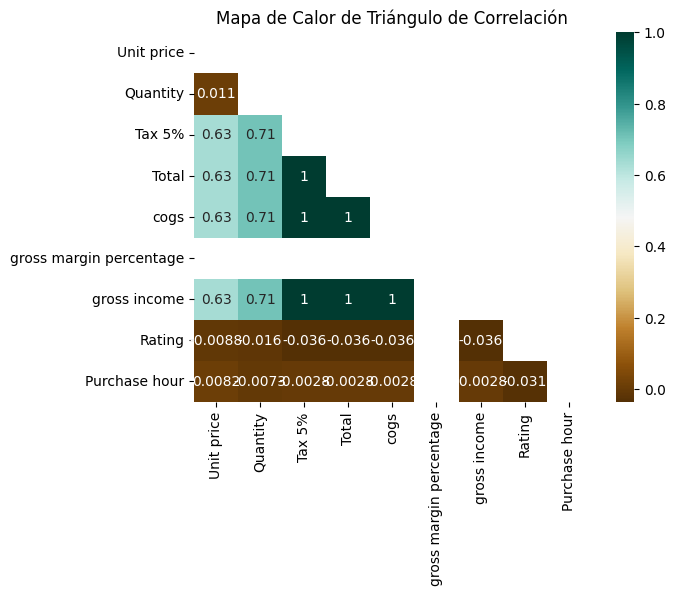

In [117]:
# 5.1 - Matriz de correlación entre la hora y el total
df['Purchase hour'] = pd.to_datetime(df['Time']).dt.hour
df['Purchase hour'] = pd.to_numeric(df['Purchase hour'])

mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
heatmap = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='BrBG', mask=mask)
heatmap.set_title('Mapa de Calor de Triángulo de Correlación')

El factor de correlación entre la hora de compra y el total de la compra es de -0.0028


<AxesSubplot: >

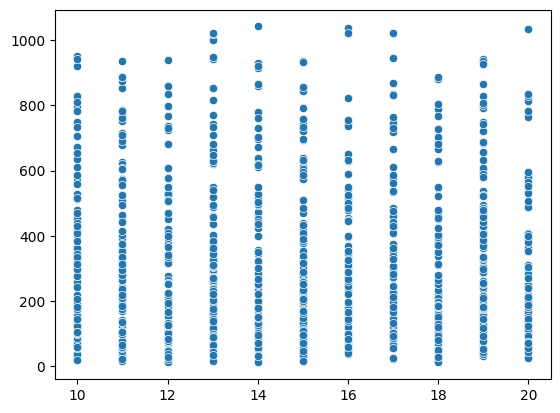

In [124]:
hour_np = df['Purchase hour'].to_numpy()
corr = np.corrcoef(hour_np, total_np)
print(f'El factor de correlación entre la hora de compra y el total de la compra es de {corr[1,0]:.4f}')
sns.scatterplot(x=hour_np, y=total_np)

El factor de correlación entre el precio unitario y el rating de la transacción es de -0.0088


<AxesSubplot: >

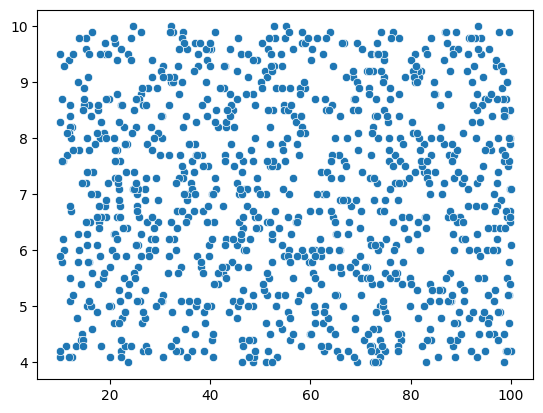

In [125]:
# 4.2 Correlación entre el precio unitario y el rating de la transacción
rating_np = df['Rating'].to_numpy()
corr = np.corrcoef(rating_np, unit_price_np)
print(f'El factor de correlación entre el precio unitario y el rating de la transacción es de {corr[1,0]:.4f}')
sns.scatterplot(x=unit_price_np, y=rating_np)

## Insights 2:
- No existe correlación alguna entre la hora de compra y el total de la compra
- No existe correlación alguna entre el precio unitario del artículo y el rating de la compra por lo que lo artículos con precio unitario más alto no necesariamente dejan una mejor ganancia